# Plots
This notebook can be used to generate all plots that can be seen in the Report. Use the `store`-variable to activate or deactivate saving the images to the `plots`-folder.

In [1]:
import os
import sys

src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)

os.makedirs('../plots', exist_ok=True)
os.makedirs('../plots/all_impl', exist_ok=True)
store = True

In [2]:
from utils.plot_utils import load_and_prepare_data, enrich_df

final_df = load_and_prepare_data(base_path='../data')
final_df = enrich_df(final_df)
display(final_df.head())

,threads,prefill_count,time,total_inserts,successful_inserts,total_deletes,successful_deletes,total_contains,successful_contains,total_operations,basic_correctness_test_success,average_operations_per_thread,implementation_name,op_mix,range_type,runtime_in_sec
0,1,0,5.000000,1.208179e+06,603291.333333,1.098621e+06,550911.666667,8.679390e+06,4.349736e+06,1.098619e+07,True,[10986189.666666666],global_lock,101080,shared,5
1,2,0,5.000003,6.861750e+05,354546.333333,6.237433e+05,302227.000000,4.928731e+06,2.386710e+06,6.238649e+06,True,"[3012502.0, 3226147.3333333335]",global_lock,101080,shared,5
2,4,0,5.000004,4.494420e+05,241594.000000,4.081937e+05,189090.000000,3.229488e+06,1.498451e+06,4.087123e+06,True,"[704360.3333333334, 1047445.3333333334, 117245...",global_lock,101080,shared,5
3,8,0,5.000015,4.320043e+05,233168.333333,3.918177e+05,180661.333333,3.098538e+06,1.430608e+06,3.922360e+06,True,"[1414403.0, 400071.3333333333, 18903.333333333...",global_lock,101080,shared,5
4,10,0,5.000025,4.207337e+05,228188.000000,3.822423e+05,175653.000000,3.024001e+06,1.390400e+06,3.826977e+06,True,"[1383331.0, 166751.66666666666, 11764.0, 79613...",global_lock,101080,shared,5


In [3]:
from utils.plot_utils import plot_throughput

op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime = [1, 5]

for op in op_mix:
    for rt in range_type:
        for r in runtime:
            plot_throughput(final_df, op, rt, r, store=store, base_path='../plots')

In [4]:
from utils.plot_utils import plot_total_vs_successful_operations
implementation_name = ['fine_lock', 'global_lock', 'lock_free', 'sequential']
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for impl in implementation_name:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_total_vs_successful_operations(final_df, impl, op, range, runtime, store=store, base_path='../plots')

In [5]:
from utils.plot_utils import plot_total_vs_successful_operations_all_implementations

operations = [('Inserts', 'total_inserts', 'successful_inserts'),
              ('Removes', 'total_deletes', 'successful_deletes'),
              ('Contains', 'total_contains', 'successful_contains')]
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for operation in operations:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_total_vs_successful_operations_all_implementations(final_df, operation, op, range, runtime, store=store, base_path='../plots')

In [6]:
from utils.plot_utils import plot_success_ratio_all_implementations

operations = [('Inserts', 'total_inserts', 'successful_inserts'),
              ('Removes', 'total_deletes', 'successful_deletes'),
              ('Contains', 'total_contains', 'successful_contains')]
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for operation in operations:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_success_ratio_all_implementations(final_df, operation, op, rt, r, store=store, base_path='../plots')

In [7]:
from utils.plot_utils import plot_speedup_vs_sequential

op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime = [1, 5]

for op in op_mix:
    for rt in range_type:
        for r in runtime:
            plot_speedup_vs_sequential(final_df, op, rt, r, store=store, base_path='../plots')

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_53116/1800478140.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


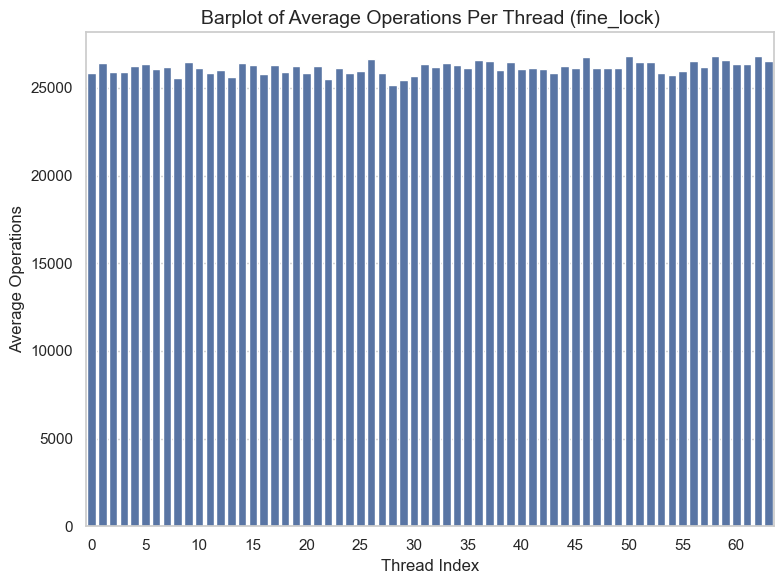

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.plot_utils import explode_average_ops_per_thread

def plot_avg_ops_per_thread(df, implementation_name, column='average_operations_per_thread'):
    df_filtered = df[
        (df['implementation_name'] == implementation_name) &
        (df['op_mix'] == '101080') &
        (df['range_type'] == 'shared') &
        (df['runtime_in_sec'] == 5) &
        (df['threads'] == 64)
    ].copy()

    df_exploded = explode_average_ops_per_thread(df_filtered, column=column)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        data=df_exploded,
        x='index_in_array',
        y=column,
    )
    plt.title(f"Barplot of Average Operations Per Thread ({implementation_name})", fontsize=14)
    plt.xlabel("Thread Index", fontsize=12)
    plt.ylabel("Average Operations", fontsize=12)
    ax.set_xticklabels(
        [lbl.get_text() if i % 5 == 0 else "" for i, lbl in enumerate(ax.get_xticklabels())]
    )

    plt.tight_layout()
    plt.show()

plot_avg_ops_per_thread(final_df, 'fine_lock')